In [ ]:
%pip install pandas 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [3]:
dfgenome_scores = pd.read_csv(r"C:\Users\SOOQ ELASER\movie_recomendation_collaborative_filtering\ml-20m\ml-20m\genome-scores.csv")

dfgenome_tags = pd.read_csv(r"C:\Users\SOOQ ELASER\movie_recomendation_collaborative_filtering\ml-20m\ml-20m\genome-tags.csv")

dflink = pd.read_csv(r"C:\Users\SOOQ ELASER\movie_recomendation_collaborative_filtering\ml-20m\ml-20m\links.csv")
dfmovie = pd.read_csv(r"C:\Users\SOOQ ELASER\movie_recomendation_collaborative_filtering\ml-20m\ml-20m\movies.csv")
dfratings = pd.read_csv(r"C:\Users\SOOQ ELASER\movie_recomendation_collaborative_filtering\ml-20m\ml-20m\ratings.csv")

dftags = pd.read_csv(r"C:\Users\SOOQ ELASER\movie_recomendation_collaborative_filtering\ml-20m\ml-20m\tags.csv")


In [4]:
dftags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [119]:
dfgenome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [120]:
dfratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [121]:
dfmovie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [122]:
dflink.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [123]:
dfgenome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [124]:
dfgenome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [125]:
dftags.shape
dfgenome_tags.shape
dfgenome_scores.shape
dflink.shape
dfmovie.shape
dfratings.shape


(20000263, 4)

In [126]:
common_columns = ['userId', 'movieId', 'timestamp']
merged_dataset = pd.merge(dftags, dfratings, on=common_columns, how='right')


In [127]:
merged_dataset.head()

,userId,movieId,tag,timestamp,rating
0,1,2,NaN,1112486027,3.5
1,1,29,NaN,1112484676,3.5
2,1,32,NaN,1112484819,3.5
3,1,47,NaN,1112484727,3.5
4,1,50,NaN,1112484580,3.5


In [128]:
merged_dataset.shape

(20000274, 5)

In [129]:
common_column = ['movieId']
dfmerged = pd.merge(merged_dataset,dflink, on=common_column, how='right')

In [130]:
dfmerged.shape

(20000808, 7)

In [131]:
dfmerged.head()

,userId,movieId,tag,timestamp,rating,imdbId,tmdbId
0,3.0,1,NaN,9.449194e+08,4.0,114709,862.0
1,6.0,1,NaN,8.582755e+08,5.0,114709,862.0
2,8.0,1,NaN,8.339819e+08,4.0,114709,862.0
3,10.0,1,NaN,9.434979e+08,4.0,114709,862.0
4,11.0,1,NaN,1.230859e+09,4.5,114709,862.0


In [132]:
dfmerged = dfmerged.drop(columns=['tag'])

In [133]:
dfmerged.head()

,userId,movieId,timestamp,rating,imdbId,tmdbId
0,3.0,1,9.449194e+08,4.0,114709,862.0
1,6.0,1,8.582755e+08,5.0,114709,862.0
2,8.0,1,8.339819e+08,4.0,114709,862.0
3,10.0,1,9.434979e+08,4.0,114709,862.0
4,11.0,1,1.230859e+09,4.5,114709,862.0


In [134]:
common_col = ["movieId"]
dfmerged = pd.merge(dfmovie, dfmerged, on=common_col, how="right")

In [135]:
dfmerged.shape

(20000808, 8)

In [136]:
dfmerged.head()

,movieId,title,genres,userId,timestamp,rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,9.449194e+08,4.0,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,8.582755e+08,5.0,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,8.339819e+08,4.0,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,9.434979e+08,4.0,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,1.230859e+09,4.5,114709,862.0


In [137]:
dfmerged["imdbId"].nunique()

27278

In [138]:
dfmerged[dfmerged.duplicated()].sum()

movieId                                                 120561
title        Song of the South (1946)Song of the South (194...
genres       Adventure|Animation|Children|MusicalAdventure|...
userId                                                293862.0
timestamp                                        13971283500.0
rating                                                    36.0
imdbId                                                 2432765
tmdbId                                                117353.0
dtype: object

In [139]:
dfmerged.value_counts().sum()

np.int64(19987692)

In [140]:
dflink.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [141]:
dfmerged.columns

Index(['movieId', 'title', 'genres', 'userId', 'timestamp', 'rating', 'imdbId',
       'tmdbId'],
      dtype='object')

In [142]:
dfgenome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [143]:


# Load the datasets with actual file paths
dfgenome_scores = pd.read_csv(r'C:\Users\SOOQ ELASER\movie_recomendation_collaborative_filtering\ml-20m\ml-20m\genome-scores.csv')
dfmovies = dfmerged 

# Define the common column for merging
common_coll = ['movieId']

# Step 1: Select only necessary columns to reduce memory usage
dfgenome_scores_small = dfgenome_scores[['movieId', 'tagId', 'relevance']]
dfmovies_small = dfmovies[['movieId', 'title', 'genres', 'userId', 'rating']]

# Step 2: Drop duplicates in the common column to avoid excessive rows from duplicate merges
dfgenome_scores_small = dfgenome_scores_small.drop_duplicates(subset=common_coll)
dfmovies_small = dfmovies_small.drop_duplicates(subset=common_coll)

# Step 3: Optimize data types to reduce memory usage
# Downcast numerical columns (if applicable)
for col in dfgenome_scores_small.select_dtypes(include=['float64', 'int64']).columns:
    dfgenome_scores_small[col] = pd.to_numeric(dfgenome_scores_small[col], downcast='float')
for col in dfmovies_small.select_dtypes(include=['float64', 'int64']).columns:
    dfmovies_small[col] = pd.to_numeric(dfmovies_small[col], downcast='float')

# Convert object columns to categories if they have few unique values
for col in dfgenome_scores_small.select_dtypes(include=['object']).columns:
    if dfgenome_scores_small[col].nunique() / len(dfgenome_scores_small[col]) < 0.5:
        dfgenome_scores_small[col] = dfgenome_scores_small[col].astype('category')
for col in dfmovies_small.select_dtypes(include=['object']).columns:
    if dfmovies_small[col].nunique() / len(dfmovies_small[col]) < 0.5:
        dfmovies_small[col] = dfmovies_small[col].astype('category')

# Step 4: Perform a chunked merge to handle large data efficiently
chunk_size = 100000  # Adjust chunk size based on available memory
merged_chunks = []

for chunk in pd.read_csv(r'C:\Users\SOOQ ELASER\movie_recomendation_collaborative_filtering\ml-20m\ml-20m\genome-scores.csv', chunksize=chunk_size):
    chunk = chunk[['movieId', 'tagId', 'relevance']] 
    merged_chunk = pd.merge(dfmovies_small, chunk, on=common_coll, how='inner')
    merged_chunks.append(merged_chunk)

# Combine all chunked merges into a final DataFrame
dfmerged_final = pd.concat(merged_chunks, ignore_index=True)



In [144]:
dfmerged_final.head()

,movieId,title,genres,userId,rating,tagId,relevance
0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1,0.02500
1,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,2,0.02500
2,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,3,0.05775
3,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,4,0.09675
4,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,5,0.14675


In [145]:
dfmerged_final.shape

(11709768, 7)

In [146]:
dfmerged_final[dfmerged_final.duplicated()]

,movieId,title,genres,userId,rating,tagId,relevance


In [1]:
dfmerged_final.isnull().sum()





NameError: name 'dfmerged_final' is not defined

In [148]:
dfmerged_final = dfmerged_final.dropna()

In [149]:
dfmerged_final.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
tagId        0
relevance    0
dtype: int64

In [150]:
dfmerged_final.shape

(11697360, 7)

In [151]:
dfgenome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [154]:
dfgenome_tags['tag'].nunique()

1128

In [155]:
dfgenome_tags.tail()

,tagId,tag
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie
1127,1128,zombies


In [156]:
dfgenome_tags.shape

(1128, 2)

## Rating Distribution Analysis

### Distribution of Ratings

The following histogram displays the frequency of ratings given by users in our movie recommendation dataset. Each bin represents a range of rating scores, allowing us to see how many ratings fall into each category.

- **Histogram Interpretation:**
  - The x-axis represents the rating scores, while the y-axis shows the number of ratings for each score.
  - Observing the shape of the histogram provides insights into user behavior; for instance, if most ratings cluster around the higher end (e.g., 4 and 5 stars), this could indicate a tendency for users to favor movies more positively.


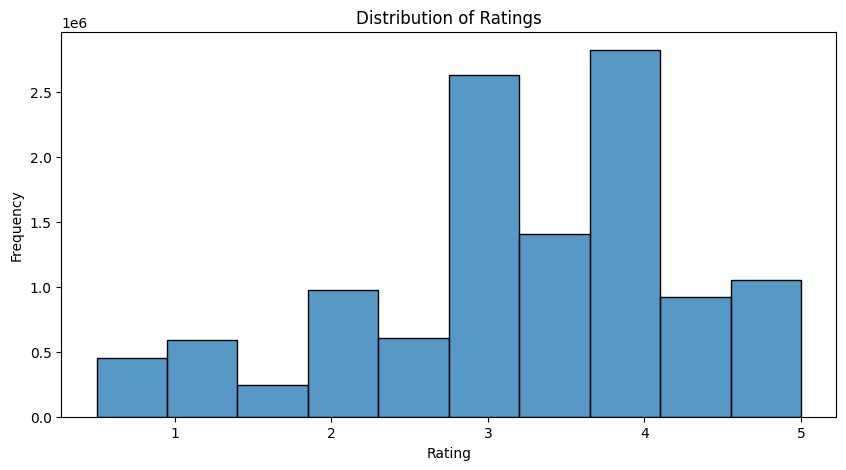

In [157]:
# Plotting a histogram
plt.figure(figsize=(10, 5))
sns.histplot(dfmerged_final['rating'], bins=10, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


### KDE Plot of Ratings

The KDE (Kernel Density Estimate) plot offers a smoothed representation of the rating distribution, providing a clearer view of the density of ratings across the scale.

- **KDE Plot Interpretation:**
  - Similar to the histogram, the x-axis represents the rating scores, while the y-axis indicates the density of ratings.
  - This plot allows us to identify subtle trends, such as whether users disproportionately favor certain ratings (like 4.5 or 3.0).
  - The smooth curve helps to visualize potential peaks in ratings that might not be as evident in the histogram.


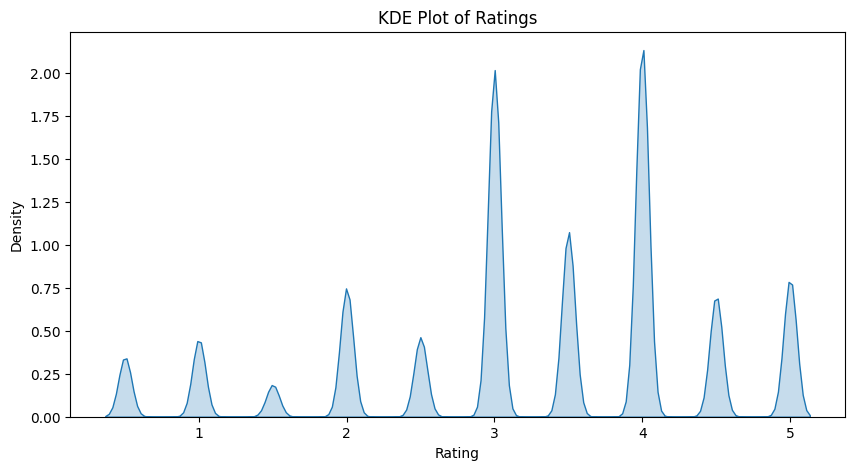

In [158]:
# Plotting a KDE plot
plt.figure(figsize=(10, 5))
sns.kdeplot(dfmerged_final['rating'], fill=True)
plt.title('KDE Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

### Correlation Matrix Analysis

In this section, we calculate and visualize the correlation matrix of the numeric features in the merged movie dataset. The correlation matrix helps us understand the relationships between different numeric variables, indicating how closely related they are to one another.

#### Code Explanation

1. **Import Libraries**: We import the necessary libraries for data manipulation and visualization:
   - `pandas` for data handling.
   - `seaborn` and `matplotlib.pyplot` for plotting.

2. **Selecting Numeric Columns**: We filter the DataFrame `dfmerged_final` to retain only numeric columns using `select_dtypes(include=['float64', 'int64'])`. This step is crucial as correlation calculations require numeric data.

3. **Calculating Correlation Matrix**: The `corr()` method computes the correlation coefficients between the numeric columns. The output is a square matrix where each cell shows the correlation between the respective features.

4. **Visualization**: We use Seaborn's `heatmap` function to create a visual representation of the correlation matrix. The `annot=True` parameter displays the correlation coefficients in the heatmap cells, and `cmap='coolwarm'` sets the color palette for better visualization.


              tagId  relevance
tagId      1.000000   0.012331
relevance  0.012331   1.000000


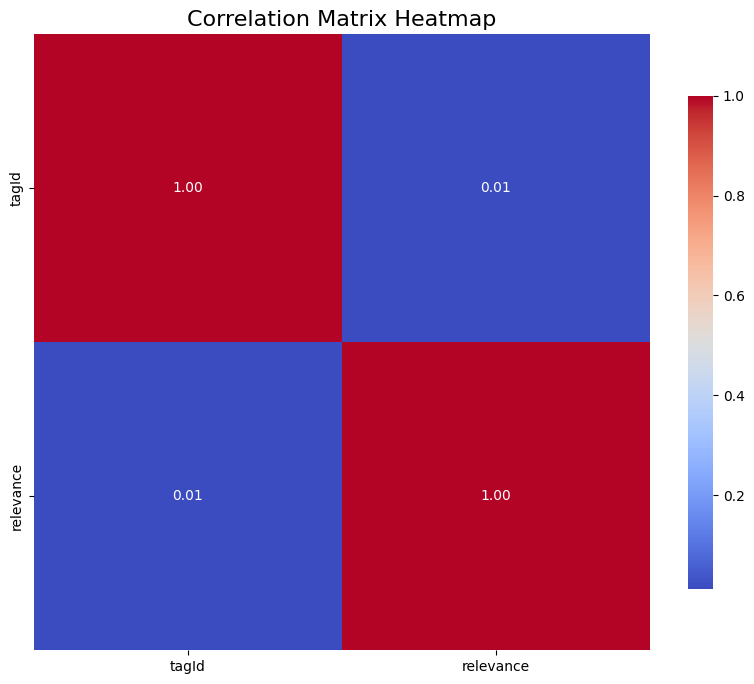

In [163]:
# Select only numeric columns for correlation analysis
numeric_df = dfmerged_final.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
print(correlation_matrix)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [164]:
dfmerged_final.head()

,movieId,title,genres,userId,rating,tagId,relevance
0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1,0.02500
1,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,2,0.02500
2,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,3,0.05775
3,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,4,0.09675
4,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,5,0.14675


In [165]:
dfmerged_final["title"].nunique()

10369

In [168]:


# Assuming dfmerged_final is your DataFrame
# Select only numeric columns
numeric_cols = dfmerged_final.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
dfmerged_final[numeric_cols] = scaler.fit_transform(dfmerged_final[numeric_cols])

dfmerged_final.head()


,movieId,title,genres,userId,rating,tagId,relevance
0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,-1.730516,-0.593119
1,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,-1.727445,-0.593119
2,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,-1.724374,-0.380789
3,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,-1.721303,-0.127937
4,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,-1.718232,0.196233


In [169]:
dfmerged_final['genres'].nunique()

930

In [178]:
# List of columns to encode
columns_to_encode = ['title', 'genres']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each specified column
for col in columns_to_encode:
    dfmerged_final[f'{col}_encoded'] = label_encoder.fit_transform(dfmerged_final[col])

# Display the DataFrame with encoded columns
dfmerged_final.head()

,movieId,title,genres,userId,rating,tagId,relevance,title_encoded,genres_encoded
0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,-1.730516,-0.593119,9435,330
1,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,-1.727445,-0.593119,9435,330
2,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,-1.724374,-0.380789,9435,330
3,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,-1.721303,-0.127937,9435,330
4,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,-1.718232,0.196233,9435,330


In [180]:
# Drop the specified columns
dfmerged_final = dfmerged_final.drop(columns=['title', 'genres'])

In [181]:
dfmerged_final.head()

,movieId,userId,rating,tagId,relevance,title_encoded,genres_encoded
0,1.0,3.0,4.0,-1.730516,-0.593119,9435,330
1,1.0,3.0,4.0,-1.727445,-0.593119,9435,330
2,1.0,3.0,4.0,-1.724374,-0.380789,9435,330
3,1.0,3.0,4.0,-1.721303,-0.127937,9435,330
4,1.0,3.0,4.0,-1.718232,0.196233,9435,330


In [182]:
dfmerged_final.shape

(11697360, 7)

In [183]:
dfmerged_final.isnull().sum()

movieId           0
userId            0
rating            0
tagId             0
relevance         0
title_encoded     0
genres_encoded    0
dtype: int64